<a href="https://colab.research.google.com/github/JHayhow/Project-1-Global-and-Local-Temperatures/blob/main/Project_1_Udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relevant SQL Code for pulling the data:

Select * from global_data;

Select * from city_list
where country='United Kingdom';

Select * from city_data
where country='United Kingdom' and city='London';

Importing the Temperature Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
London_Temperatures = pd.read_csv('London Temp Data.csv')
y = London_Temperatures.iloc[:,-1].values

In [3]:
London_Temperatures.head()

,year,city,country,avg_temp,7-year moving average
0,1743,London,United Kingdom,7.54,NaN
1,1744,London,United Kingdom,10.34,NaN
2,1745,London,United Kingdom,4.13,NaN
3,1746,London,United Kingdom,NaN,NaN
4,1747,London,United Kingdom,NaN,NaN


In [4]:
London_Temperatures.tail()

,year,city,country,avg_temp,7-year moving average
266,2009,London,United Kingdom,10.52,10.720000
267,2010,London,United Kingdom,9.38,10.515714
268,2011,London,United Kingdom,11.19,10.575714
269,2012,London,United Kingdom,10.00,10.485714
270,2013,London,United Kingdom,9.91,10.315714


In [5]:
moving_av_london = London_Temperatures['7-year moving average']
year = London_Temperatures['year']

In [6]:
moving_av_london = moving_av_london.iloc[7:]

In [7]:
moving_av_london.head()

7     8.240000
8     8.123333
9     8.926667
10    9.050000
11    9.080000
Name: 7-year moving average, dtype: float64

In [8]:
global_data = pd.read_csv('global_data.csv')
#Cutting off last two rows of Global Data so that the years match
global_data=global_data[:-2]
moving_av_global = global_data['7-year moving average']
years = global_data['year']

In [9]:
global_data.head()

,year,avg_temp,7-year moving average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN


In [10]:
global_data.tail()

,year,avg_temp,7-year moving average
259,2009,9.51,9.535714
260,2010,9.70,9.560000
261,2011,9.52,9.588571
262,2012,9.51,9.561429
263,2013,9.61,9.572857


In [11]:
moving_av_global.tail()

259    9.535714
260    9.560000
261    9.588571
262    9.561429
263    9.572857
Name: 7-year moving average, dtype: float64

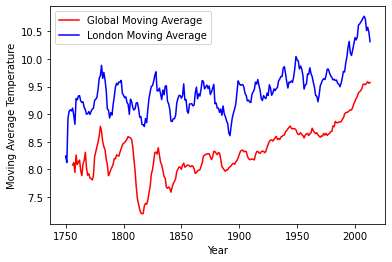

In [12]:
plt.plot(years,moving_av_global,color='r',label='Global Moving Average')
plt.plot(years,moving_av_london,color='b',label='London Moving Average')

plt.ylabel('Moving Average Temperature')
plt.xlabel('Year')

plt.legend()
plt.show()

Graphing the Changes in Temperature

In [13]:
#Finding the changes in temperature each year
london_temp_change = np.diff(moving_av_london)
global_temp_change = np.diff(moving_av_global)
#Getting rid of the first recorded year because no change can be observed
years = years[1:]

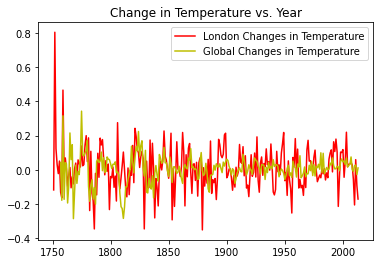

In [14]:
plt.plot(years,london_temp_change,label='London Changes in Temperature',color='r')
plt.plot(years,global_temp_change,label='Global Changes in Temperature',color='y')
plt.title('Change in Temperature vs. Year')
plt.legend()
plt.show()

Graphing the differences in temperature between London and the globe for a given year

In [15]:
moving_av_global_array = moving_av_global.to_numpy()

In [16]:
moving_av_london_array = moving_av_london.to_numpy()

In [17]:
difference = np.subtract(moving_av_global_array,moving_av_london_array)

In [18]:
years_array = years.to_numpy()

In [19]:
year_1750 = np.append(1750,years_array)

In [20]:
print(year_1750)

[1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763
 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777
 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791
 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805
 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819
 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833
 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847
 1848 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861
 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875
 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889
 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903
 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917
 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931
 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1946 

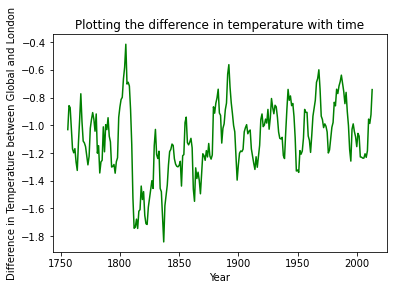

In [21]:
plt.plot(year_1750,difference,color='g')
plt.title('Plotting the difference in temperature with time')
plt.xlabel('Year')
plt.ylabel('Difference in Temperature between Global and London')
plt.show()

See extra challenges in the criteria to make this project stand out!

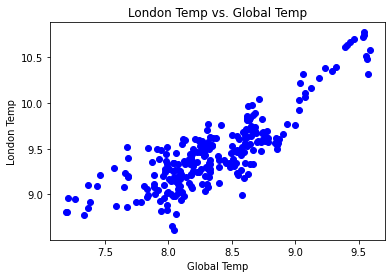

In [22]:
# See if the temperatures follow a linear relationship:

plt.scatter(moving_av_global,moving_av_london, color='b')
plt.title('London Temp vs. Global Temp')
plt.ylabel('London Temp')
plt.xlabel('Global Temp')
plt.show()

Now use the data to fit a straight line and make some predictions. Use LinearRegression and calculate the coefficient of correlation

In [25]:
#Checking for nans
np.any(np.isnan(moving_av_global))

True

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
moving_av_global_array = imputer.fit_transform(moving_av_global_array.reshape(-1,1))

In [30]:
np.any(np.isnan(moving_av_global_array))

False

In [31]:
np.any(np.isnan(moving_av_london_array))

False

In [36]:
moving_av_global_array.flatten().shape

(264,)

In [35]:
moving_av_london_array.shape

(264,)

In [39]:
correlation_coefficient = np.corrcoef(moving_av_global_array.flatten(),moving_av_london_array)
print("The correlation coefficient is:",correlation_coefficient[0][1])

The correlation coefficient is: 0.80396419756552


Create a prediction of the local temperature given the global temperature:

In [42]:
X = moving_av_london_array.reshape(-1,1)
y = moving_av_global_array.reshape(-1,1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = linreg.predict(X)

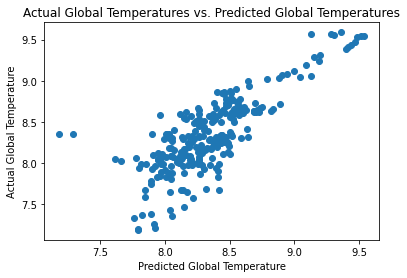

In [51]:
plt.scatter(y_pred,y)
plt.xlabel('Predicted Global Temperature')
plt.ylabel('Actual Global Temperature')
plt.title('Actual Global Temperatures vs. Predicted Global Temperatures')
plt.show()

In [52]:
#Evaluate these predictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
rmse = mse**0.5
print(rmse)

0.2711414504182766


In [53]:
#Make some predictions
linreg.predict([[10.0]])

array([[8.84828611]])